# Optimización del Activo
## Import de paquetes y funciones

In [56]:
library("readxl")
library("lubridate")
library('tidyr')
library('ggplot2')
library('YieldCurve')
library('dplyr')

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:xts':

    first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
search()

[1] ".GlobalEnv"         "package:YieldCurve" "package:xts"       
 [4] "package:zoo"        "package:ggplot2"    "package:tidyr"     
 [7] "package:lubridate"  "package:readxl"     "jupyter:irkernel"  
[10] "jupyter:irkernel"   "package:stats"      "package:graphics"  
[13] "package:grDevices"  "package:utils"      "package:datasets"  
[16] "package:methods"    "Autoloads"          "package:base"

In [3]:
source("helpers.R")

### Simulación de personas

In [4]:
pathmort <- 'C:/Users/Diana C Contreras/OneDrive - Universidad de Los Andes/Riesgo Financiero/Talleres/T1-Riesgo/Taller 2/data/Mortality.xlsx'

In [5]:
mortality <- read_excel(pathmort, sheet=1,skip=2, col_names=c('age','i_m','d_m','q_m','e_m','age_2','i_f','d_f','q_f','e_f'))
mortality <- mortality[,c(1,4,9)]
mortality <- data.frame(lapply(mortality, function(x) as.numeric(as.character(x))))
head(mortality)

,age,q_m,q_f
,<dbl>,<dbl>,<dbl>
1,50,0.003353,0.001880
2,51,0.003641,0.002042
3,52,0.003956,0.002219
4,53,0.004301,0.002412
5,54,0.004681,0.002625
6,55,0.005050,0.002833


In [6]:
simulaciones <- function(future=60){
    t_ages<- list()
    for (i in 50:89){
        m=7500
        f=7500
        t_l <- c(15000)
        for (j in 1:future){
            m <- sum(rbinom(m, size=1, prob= (1-mortality$q_m[j])))
            f <- sum(rbinom(f, size=1, prob= (1-mortality$q_f[j])))
            t_l <- c(t_l, (m+f) )
        }
    t_ages<- c(t_ages, t_l)
    }
    t_ages <- as.data.frame(matrix(t_ages, byrow=TRUE, nrow= length(c(50:89)) ))
    t_ages <- data.frame(lapply(t_ages, function(x) as.numeric(as.character(x))))
    t_sum <- colSums(t_ages)
return(t_sum) 
}

In [7]:
future <- 60
sims <- data.frame(matrix(NA, nrow = 1000, ncol = (future+1)))
for (i in 1:1000){
    sims[i,] <- simulaciones(future)
}


In [10]:
write.csv(sims,'C:/Users/Diana C Contreras/OneDrive - Universidad de Los Andes/Riesgo Financiero/Talleres/T1-Riesgo/Taller 2/data/proyection.csv',row.names=F)

In [11]:
install.packages('data.table')
library('data.table')

Installing package into 'C:/Users/Diana C Contreras/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



  There is a binary version available but the source version is later:
           binary source needs_compilation
data.table 1.14.0 1.14.2              TRUE

  Binaries will be installed
package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Diana C Contreras\AppData\Local\Temp\RtmpEnl9rI\downloaded_packages


Warning message:
"package 'data.table' was built under R version 3.6.3"
Attaching package: 'data.table'

The following objects are masked from 'package:xts':

    first, last

The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year



In [12]:
sims$id <- seq(1, 1000, 1)

In [16]:
long_sims <- melt(data= sims,id.vars='id', variable.name="period_f", value.name= "alive")

Warning message in melt(data = sims, id.vars = "id", variable.name = "period_f", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(sims). In the next version, this warning will become an error."

In [17]:
head(long_sims)

,id,period_f,alive
,<dbl>,<fct>,<dbl>
1,1,X1,6e+05
2,2,X1,6e+05
3,3,X1,6e+05
4,4,X1,6e+05
5,5,X1,6e+05
6,6,X1,6e+05


In [20]:
long_sims$period_f <- as.numeric(substring(as.character(long_sims$period_f), 2))

In [21]:
head(long_sims)

,id,period_f,alive
,<dbl>,<dbl>,<dbl>
1,1,1,6e+05
2,2,1,6e+05
3,3,1,6e+05
4,4,1,6e+05
5,5,1,6e+05
6,6,1,6e+05


In [58]:
long_sims$flow <- long_sims$alive*0.000018
c_l_sims <- long_sims %>%
            group_by(period_f) %>%
            summarise(alive = mean(alive), flow = mean(flow))


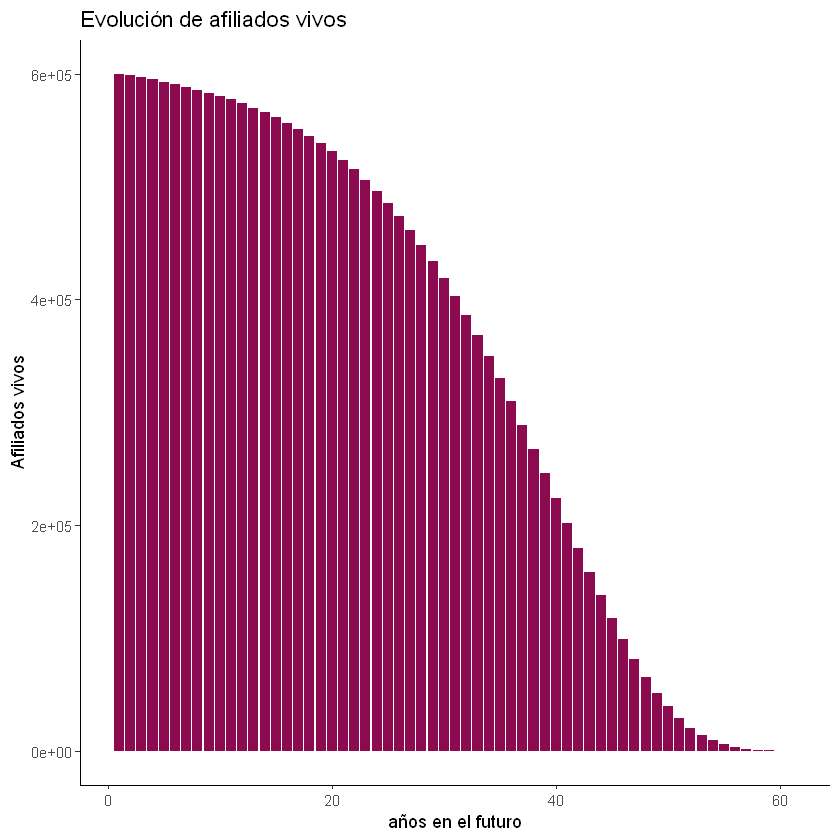

In [62]:
ggplot(c_l_sims,aes(period_f,alive))+  geom_col( fill='deeppink4') + labs(x="años en el futuro", y='Afiliados vivos',title='Evolución de afiliados vivos') +theme_classic()

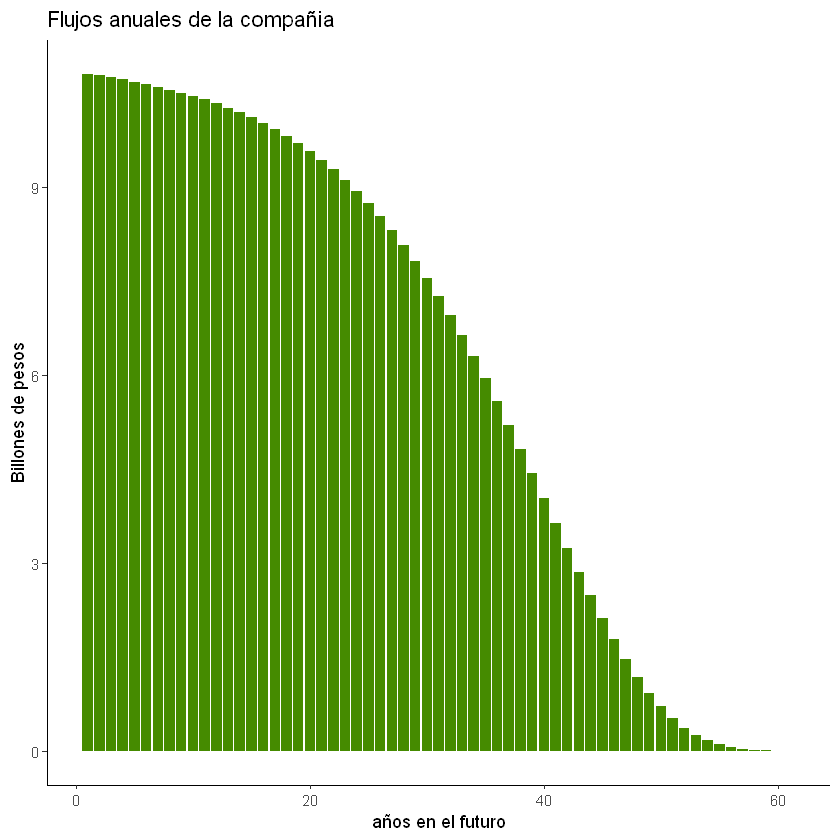

In [63]:

ggplot(c_l_sims,aes(period_f,flow))+ geom_col(fill='chartreuse4') + labs(x="años en el futuro", y='Billones de pesos',title='Flujos anuales de la compañia') +theme_classic()

In [49]:
head(long_sims)

,id,period_f,alive,flow
,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,6e+05,10.8
2,2,1,6e+05,10.8
3,3,1,6e+05,10.8
4,4,1,6e+05,10.8
5,5,1,6e+05,10.8
6,6,1,6e+05,10.8


## Import de bases de datos de los indices
En esta sección se importan todos los datos de las tasas de interés de los bonos y activos requeridos.   
Adicionalmente, se encuentra la estimación de Nelson Sieguel para descomponer el comportamiento de las tasas.

In [4]:
path <- 'C:/Users/Diana C Contreras/OneDrive - Universidad de Los Andes/Riesgo Financiero/Talleres/T1-Riesgo/Taller 2/data/data.xlsx'

### Empezamos con los bonos TES en pesos.

In [66]:
tes_cop <- read_excel(path, sheet=1,skip=7, col_names=c('Date','6m','1y','3y','5y','10y','15y'))

In [67]:
tes_cop <- tes_cop[tes_cop$Date >= "2012-04-26",]
tes_cop <- as.data.frame(tes_cop)
rownames(tes_cop) <- tes_cop$Date
tes_cop <- tes_cop[,-c(1)]
tes_cop <- sapply(tes_cop, as.numeric)



[1] 2592

In [121]:
tes_maturity <- c(0.5,1,3,5,10,15)
tes_cop_ns <- Nelson.Siegel( rate=tes_cop,	maturity=tes_maturity)


### TES en UVR   
Notese que en este caso se importan directamente los resultados de Nelson Sieguel

In [8]:
tes_uvr_ns <- read_excel(path, sheet='TES UVR Betas',skip=1, col_names=c('Date','beta_0','beta_1','beta_2','lambda'))
tes_uvr_ns <- as.data.frame(tes_uvr_ns)
rownames(tes_uvr_ns) <- tes_uvr_ns$Date
tes_uvr_ns <- tes_uvr_ns[,-c(1)]
head(tes_uvr_ns)

,beta_0,beta_1,beta_2,lambda
,<dbl>,<dbl>,<dbl>,<dbl>
2022-04-08,0.09647801,-0.03119406,0.04511467,3.7
2022-04-07,0.09405698,-0.02969244,0.04226096,3.7
2022-04-06,0.09469592,-0.02990299,0.04248866,3.7
2022-04-05,0.09408631,-0.02883965,0.04186647,3.7
2022-04-04,0.09664698,-0.03390216,0.04312384,3.7
2022-04-01,0.09685086,-0.03217370,0.04468412,3.7


### Corporativo a EEUU

In [9]:
corp_usa <- read_excel(path, sheet='Corporativo A EEUU',skip=8, col_names=c('Date','3m','6m','1y','3y','5y','10y','15y'))

corp_usa <- as.data.frame(corp_usa)
rownames(corp_usa) <- corp_usa$Date
corp_usa <- corp_usa[,-c(1)]
head(corp_usa)

,3m,6m,1y,3y,5y,10y,15y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2009-10-13,1.1404,1.2181,1.5046,2.5661,3.4811,4.7076,5.3309
2009-10-14,1.1381,1.2208,1.5196,2.6013,3.5293,4.7843,5.4388
2009-10-15,1.1055,1.1932,1.5041,2.6295,3.5733,4.8308,5.4545
2009-10-16,1.2114,1.2897,1.5619,2.6139,3.5447,4.7820,5.4008
2009-10-19,1.1778,1.2627,1.5420,2.5997,3.5283,4.7502,5.3610
2009-10-20,1.1593,1.2421,1.5096,2.5454,3.4739,4.7214,5.3203


In [10]:
corp_usa_maturity <- c(3/12,0.5,1,3,5,10,15)
corp_usa_ns <- Nelson.Siegel( rate=corp_usa,	maturity=corp_usa_maturity)
head(corp_usa_ns)

,beta_0,beta_1,beta_2,lambda
,<dbl>,<dbl>,<dbl>,<dbl>
2009-10-13,6.461855,-5.425669,-4.169706,0.5517879
2009-10-14,6.731600,-5.748756,-3.643443,0.4781896
2009-10-15,6.607364,-5.625489,-4.118086,0.5517879
2009-10-16,6.550958,-5.437508,-4.269783,0.5517879
2009-10-19,6.495381,-5.421099,-4.152560,0.5517879
2009-10-20,6.476177,-5.408359,-4.283447,0.5517879


### ETF's de seguimiento de la economía colombiana (COLCAP) y estadounidense (SPX)

In [11]:
index <- read_excel(path, sheet='Indices Accionarios',skip=7, col_names=c('Date','colcap','spx'))
index <- as.data.frame(index)
rownames(index) <- index$Date
index <- index[,-c(1)]
head(index)

,colcap,spx
,<dbl>,<dbl>
2009-10-13,1303.03,1073.19
2009-10-14,1294.39,1092.02
2009-10-15,1294.11,1096.56
2009-10-16,1301.69,1087.68
2009-10-19,1330.80,1097.91
2009-10-20,1315.97,1091.06


### Indice de Precios al consumidor

In [12]:
ipc <- read_excel(path, sheet='IPC',skip=1, col_names=c('Date','ipc'))
ipc <- as.data.frame(ipc)

head(ipc)

,Date,ipc
,<dttm>,<dbl>
1,1954-07-31,0.02632
2,1954-08-31,0.02612
3,1954-09-30,0.02576
4,1954-10-31,0.02585
5,1954-11-30,0.02591
6,1954-12-31,0.02605


### Tasa de cambio

In [13]:
trm <- read_excel(path, sheet='TRM',skip=1, col_names=c('Date','trm'))
trm <- as.data.frame(trm)
head(trm)

,Date,trm
,<dttm>,<dbl>
1,1991-11-27,693.32
2,1991-11-28,693.99
3,1991-11-29,694.70
4,1991-11-30,694.70
5,1991-12-01,643.42
6,1991-12-02,643.42


## Simulaciones de proyección
En esta sección se estiman las 1000 simulaciones para cada uno de los productos financieros. En el caso de los bonos TES cop, TES UVR y corp EEUU se realiza el análisis de componentes principales.

In [14]:
librerias <- c("forecast","xts","rugarch","timeSeries","ggplot2","astsa","scales","lubridate","reshape2","quantmod","xtable","tseries")

In [15]:
library('stats')

In [16]:
if(length(setdiff(librerias, rownames(installed.packages()))) > 0){
  install.packages(setdiff(librerias, rownames(installed.packages())))}
invisible(sapply(librerias, require, character.only = TRUE,quietly = TRUE))

Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Warning message:
"package 'rugarch' was built under R version 3.6.3"
Attaching package: 'rugarch'

The following object is masked from 'package:stats':

    sigma

Warning message:
"package 'timeSeries' was built under R version 3.6.3"Warning message:
"package 'timeDate' was built under R version 3.6.2"
Attaching package: 'timeSeries'

The following object is masked from 'package:zoo':

    time<-


Attaching package: 'astsa'

The following object is masked from 'package:forecast':

    gas

Warning message:
"package 'scales' was built under R version 3.6.3"Warning message:
"package 'reshape2' was built under R version 3.6.3"
Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

Version 0.4-0 included new data defaults. See ?getSymbols.
Warning message:
"package 'xtable' was buil

### TES Pesos
Lo primero es que obtenemos el cambio en los betas y el lambda de NSiegel:

In [17]:
i_tes_cop <- tes_cop_ns[-nrow(tes_cop_ns),]
f_tes_cop <- tes_cop_ns[-1,]
delta_tes_cop_ns <- f_tes_cop - i_tes_cop

In [18]:
head(delta_tes_cop_ns)

beta_0,beta_1,beta_2,lambda
-0.06977175,0.02571902,-0.106241637,0.02218765
-0.01312430,0.01856500,0.029002789,0.00000000
-0.04168666,0.09245968,-0.002141761,0.00000000
-0.09177265,0.10452687,0.019206748,0.00000000
-0.06661783,0.08733963,-0.001957500,0.01320032
0.04701532,-0.02721950,-0.017491214,-0.01320032


Con la metodologìa de PCA reducimos la dimensionalidad:

In [19]:
pca_tes_cop <- prcomp(delta_tes_cop_ns, scale=TRUE)
summary(pca_tes_cop)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.6131 1.1051 0.38098 0.17741
Proportion of Variance 0.6506 0.3053 0.03629 0.00787
Cumulative Proportion  0.6506 0.9558 0.99213 1.00000

In [20]:
head(pca_tes_cop$x)

PC1,PC2,PC3,PC4
-0.01321555,-0.23584992,0.064994517,-0.067192525
-0.04888901,-0.02182426,-0.003923853,0.005501787
-0.15294004,-0.12858967,-0.085797390,0.026638042
-0.23522372,-0.17617426,-0.065824742,-0.033053438
-0.13905373,-0.22124785,-0.007551177,0.010983057
0.05181849,0.14164076,-0.059745127,0.011150354


Seleccionamos los primeros 2 componentes que explican el 95% del comportamiento de la serie y corremos un arima para cada uno de ellos

In [45]:
arima_pca_1_tes_cop <- auto.arima(pca_tes_cop$x[,1],stepwise = T,approximation = F)
Box.test(arima_pca_1_tes_cop$residuals)
arima_pca_2_tes_cop  <- auto.arima(pca_tes_cop$x[,2],stepwise = T,approximation = F)
Box.test(arima_pca_1_tes_cop$residuals)



	Box-Pierce test

data:  arima_pca_1_tes_cop$residuals
X-squared = 0.018308, df = 1, p-value = 0.8924



	Box-Pierce test

data:  arima_pca_1_tes_cop$residuals
X-squared = 0.018308, df = 1, p-value = 0.8924


Simulamos a 260 periodos en el futuro (1 año) y realizamos el mismo procedimiento 1000 veces

In [147]:
future <- 260 #52 semanas y 5 dìas a la semana para evaluar a un año
simulations <- 1000

In [47]:
sim_pca_1_tes_cop <- replicate(expr = simulate(object = arima_pca_1_tes_cop,nsim = future),n = simulations)
sim_pca_2_tes_cop <- replicate(expr = simulate(object =arima_pca_2_tes_cop,nsim = future),n = simulations)
Bt1 <- pca_tes_cop$rotation[,1] #Eigen values del primer componente
Bt2 <- pca_tes_cop$rotation[,2] #Eigen values del segundo componente


Reversamos el procedimiento de PCA, multiplicando los eigen values por el cambio en cada componente

In [59]:
delta<-matrix(,nrow=future, ncol=simulations)

for (i in 1:future){
        for (j in 1:simulations){
                delta[i,j] <- sum(sim_pca_1_tes_cop[i,j]*Bt1)+sum(sim_pca_2_tes_cop[i,j]*Bt2)
        }
}
head(delta, 3)

0.8667266,-0.6162629,-0.7101092,-0.02593674,-1.4947931,0.1331738,0.2385630,-1.3218142,-0.2986355,-1.3195469,...,-0.05672787,-0.51160508,-0.9750071,-0.81583947,0.2662714,-1.3493055,-0.8440075,-0.63457252,-1.41531198,0.1629867
-0.8934856,0.6276854,0.8532216,0.14676585,0.5528627,-0.2451592,-0.4553099,-0.2240811,0.5991739,-0.0370114,...,-0.90343711,-0.03551573,0.3742178,0.23826482,-1.1378925,0.5160537,1.1304199,-0.14146838,0.28514031,-0.2556540
0.1433665,-0.8739295,0.3607352,-0.56205363,1.7892906,0.4841982,0.1907714,1.0055555,-0.6151569,-0.1830808,...,0.07051410,0.04185852,0.4738914,0.04853035,1.2690662,-1.0985671,-0.2457784,0.05247762,-0.09210574,-0.4420530


In [108]:
f_ns_tes_cop <- list()
alpha <- tes_cop_ns[nrow(tes_cop_ns),] 
alphanuevo <- alpha + 2
for (i in 1:simulations){
        newalph <- alpha
        for (j in 1:future){
                newalph <-  newalph + delta[j,i] 
                        if (j==260){
                                f_ns_tes_cop <- append(f_ns_tes_cop, newalph) #Guardamos unicamente los resultados del último periodo pues es la frontera a un año
                        }
        }
}
mat_f_ns_tes_cop <- matrix(f_ns_tes_cop, ncol=4,byrow=T)
mat_f_ns_tes_cop <- as.data.frame(mat_f_ns_tes_cop )

In [109]:
names(mat_f_ns_tes_cop) <- c('beta_0','beta_1', 'beta_2', 'lambda')

In [110]:
mat_f_ns_tes_cop<- data.frame(lapply(mat_f_ns_tes_cop, function(x) as.numeric(x)))

Calculamos las tasas del bono por medio de los parametros de NS

In [138]:
nelson_sieguel_rate <- function(insumo,maturity){
    x <- insumo[,1] + insumo[,2]*((1 - exp(-insumo[,4]*maturity))/insumo[,4]*maturity)+insumo[,3]*(((1- exp(-insumo[,4]*maturity))/insumo[,4]*maturity)-exp(-insumo[,4]*maturity))
    x <- as.data.frame(x)
    names(x) <- c('rate')
    return(x)
}

In [142]:
tes_f_rates <- nelson_sieguel_rate(mat_f_ns_tes_cop,0.5)

In [146]:
summary(tes_f_rates)
summary(tes_cop)

      rate       
 Min.   : 11.27  
 1st Qu.: 11.61  
 Median : 12.95  
 Mean   : 24.46  
 3rd Qu.: 16.57  
 Max.   :849.82  

       6m              1y              3y              5y       
 Min.   :1.946   Min.   :2.137   Min.   :3.026   Min.   :3.888  
 1st Qu.:4.136   1st Qu.:4.336   1st Qu.:5.118   1st Qu.:5.607  
 Median :4.637   Median :4.739   Median :5.450   Median :6.040  
 Mean   :4.617   Mean   :4.759   Mean   :5.490   Mean   :6.058  
 3rd Qu.:5.289   3rd Qu.:5.368   3rd Qu.:5.853   3rd Qu.:6.449  
 Max.   :7.951   Max.   :8.104   Max.   :9.205   Max.   :9.802  
      10y              15y        
 Min.   : 4.811   Min.   : 5.212  
 1st Qu.: 6.430   1st Qu.: 6.850  
 Median : 6.815   Median : 7.221  
 Mean   : 6.869   Mean   : 7.304  
 3rd Qu.: 7.248   3rd Qu.: 7.726  
 Max.   :10.249   Max.   :10.284  